## 数据处理

数据处理是算法应用的前提，就是将人类容易理解的图像文本数据，转换为机器容易理解的数字形式，把离散的数据转换为连续的数据。

数据处理流程：

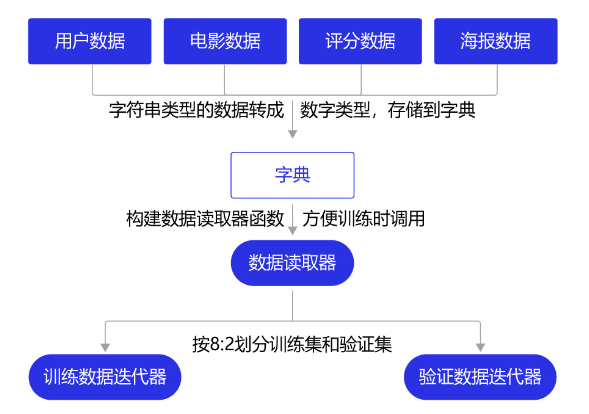

### 用户数据处理

用户数据文件user.dat中的数据格式为：UserID::Gender::Age::Occupation::Zip-code
- UserID 用户ID
- Gender 性别，F表示女性，M表示男性
- Age 用数字表示各个年龄段
- Occupation 用数字表示不同职业
- Zip-code 邮政编码

In [1]:
import numpy as np

user_file = '../datasets/ml-1m/users.dat'

with open(user_file, 'r') as f:
    data = f.readlines()
    
print('用户数据长度：', len(data))
print('第一条数据：', data[0])
print('数据格式：', type(data[0]))

用户数据长度： 6040
第一条数据： 1::F::1::10::48067

数据格式： <class 'str'>


In [2]:
# 文本数据无法直接输入到神经网络中进行计算，所以需要把字符串类型的数据转换成数字类型
def gender2num(gender):
    return 1 if gender == 'F' else 0

print('性别M用数字 {} 表示'.format(gender2num('M')))
print('性别F用数字 {} 表示'.format(gender2num('F')))

性别M用数字 0 表示
性别F用数字 1 表示


In [4]:
# 把用户数据中的字符串类型转换成数字类型，并存储到字典中
user_info = {}
max_user_id = 0

for item in data:
    item = item.strip().split('::')
    user_id = item[0]
    user_info[user_id] = {
        'user_id': int(user_id),
        'gender': gender2num(item[1]),
        'age': int(item[2]),
        'job': int(item[3])
    }
    max_user_id = max(max_user_id, int(user_id))
    
user_info

{'1': {'user_id': 1, 'gender': 1, 'age': 1, 'job': 10},
 '2': {'user_id': 2, 'gender': 0, 'age': 56, 'job': 16},
 '3': {'user_id': 3, 'gender': 0, 'age': 25, 'job': 15},
 '4': {'user_id': 4, 'gender': 0, 'age': 45, 'job': 7},
 '5': {'user_id': 5, 'gender': 0, 'age': 25, 'job': 20},
 '6': {'user_id': 6, 'gender': 1, 'age': 50, 'job': 9},
 '7': {'user_id': 7, 'gender': 0, 'age': 35, 'job': 1},
 '8': {'user_id': 8, 'gender': 0, 'age': 25, 'job': 12},
 '9': {'user_id': 9, 'gender': 0, 'age': 25, 'job': 17},
 '10': {'user_id': 10, 'gender': 1, 'age': 35, 'job': 1},
 '11': {'user_id': 11, 'gender': 1, 'age': 25, 'job': 1},
 '12': {'user_id': 12, 'gender': 0, 'age': 25, 'job': 12},
 '13': {'user_id': 13, 'gender': 0, 'age': 45, 'job': 1},
 '14': {'user_id': 14, 'gender': 0, 'age': 35, 'job': 0},
 '15': {'user_id': 15, 'gender': 0, 'age': 25, 'job': 7},
 '16': {'user_id': 16, 'gender': 1, 'age': 35, 'job': 0},
 '17': {'user_id': 17, 'gender': 0, 'age': 50, 'job': 1},
 '18': {'user_id': 18, 'ge

In [6]:
# 封装用户数据处理函数
def get_user_info(path):
    def gender2num(gender):
        return 1 if gender == 'F' else 0
    
    with open(path, 'r') as f:
        data = f.readlines()
        
    user_info = {}
    max_user_id = 0
    
    for item in data:
        item = item.strip().split('::')
        user_id = item[0]
        user_info[user_id] = {
            'user_id': int(user_id),
            'gender': gender2num(item[1]),
            'age': int(item[2]),
            'job': int(item[3])
        }
        max_user_id = max(max_user_id, int(user_id))
        
    return user_info, max_user_id


user_file = '../datasets/ml-1m/users.dat'
user_info, max_user_id = get_user_info(user_file)

print('用户数量：', len(user_info))
print('最大用户ID：', max_user_id)

user_info['1']

用户数量： 6040
最大用户ID： 6040


{'user_id': 1, 'gender': 1, 'age': 1, 'job': 10}

### 电影数据处理

电影数据文件movies.dat中的数据格式为：MovieID::Title::Genres

- MovieID
- Title 电影名称和首映年份
- Genres 电影类别，不同类别以 ｜ 分隔

In [5]:
# 封装电影数据处理函数
def get_movie_info(path):
    with open(path, 'r', encoding='ISO-8859-1') as f:
        data = f.readlines()
        
    # 建立3个字典，分别存放电影的所有、名称、类别信息
    movie_info, movie_titles, movie_cats = {}, {}, {}
    
    # 对电影名称、类别中不同的单词计数
    t_count, c_count = 1, 1
    
    # 按行读取数据并处理
    for item in data:
        item = item.strip().split('::')
        v_id = item[0]
        v_title = item[1][:-7]  # 去除title里的上映年份
        v_year = item[1][-5:-1] # 获取上映年份
        v_cat = item[2].split('|')
        
        # 统计电影名称包含的单词，并给每个单词一个序号，存放在movie_titles中
        titles = v_title.split()
        for t in titles:
            if t not in movie_titles:
                movie_titles[t] = t_count
                t_count += 1
                
        # 统计电影类别包含的单词，并给每个单词一个序号，存放在movie_cat中
        for c in v_cat:
            if c not in movie_cats:
                movie_cats[c] = c_count
                c_count += 1
                
        # 补0使电影名称对应的列表长度为15（最长的电影名称长度为15）
        title = [movie_titles[k] for k in titles]
        while len(title) < 15:
            title.append(0)
            
        # 补0使电影类别对应的列表长度为6（最多类别为6）
        cat = [movie_cats[k] for k in v_cat]
        while len(cat) < 6:
            cat.append(0)
            
        # 保存电影完整信息
        movie_info[v_id] = {
            'movie_id': int(v_id),
            'title': title,
            'cat': cat,
            'year': int(v_year)
        }
        
    return movie_info, movie_titles, movie_cats


movie_file = '../datasets/ml-1m/movies.dat'
movie_info, movie_titles, movie_cats = get_movie_info(movie_file)

print('电影数量：', len(movie_info))
print('电影名称包含的不同单词数：', len(movie_titles))
print('电影类别包含的不同单词数：', len(movie_cats))

movie_info['1']

电影数量： 3883
电影名称包含的不同单词数： 5216
电影类别包含的不同单词数： 18


{'movie_id': 1,
 'title': [1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'cat': [1, 2, 3, 0, 0, 0],
 'year': 1995}

### 评分数据处理

评分数据文件ratings.dat中的数据格式为：UserID::MovieID::Rating::Timestamp

In [10]:
# 封装评分数据处理函数
def get_rating_info(path):
    with open(path, 'r') as f:
        data = f.readlines()
        
    rating_count = len(data)
    rating_info = {}
    
    for item in data:
        item = item.strip().split('::')
        user_id, movie_id, score = item[0], item[1], item[2]
        if user_id not in rating_info.keys():
            rating_info[user_id] = {movie_id: float(score)}
        else:
            rating_info[user_id][movie_id] = float(score)
    
    return rating_info, rating_count


rating_path = '../datasets/ml-1m/ratings.dat'
rating_info, rating_count = get_rating_info(rating_path)

print('电影评分总数：', rating_count)
print('用户ID#1一共评价了{}部电影'.format(len(rating_info['1'])))

rating_info['1']

电影评分总数： 1000209
用户ID#1一共评价了53部电影


{'1193': 5.0,
 '661': 3.0,
 '914': 3.0,
 '3408': 4.0,
 '2355': 5.0,
 '1197': 3.0,
 '1287': 5.0,
 '2804': 5.0,
 '594': 4.0,
 '919': 4.0,
 '595': 5.0,
 '938': 4.0,
 '2398': 4.0,
 '2918': 4.0,
 '1035': 5.0,
 '2791': 4.0,
 '2687': 3.0,
 '2018': 4.0,
 '3105': 5.0,
 '2797': 4.0,
 '2321': 3.0,
 '720': 3.0,
 '1270': 5.0,
 '527': 5.0,
 '2340': 3.0,
 '48': 5.0,
 '1097': 4.0,
 '1721': 4.0,
 '1545': 4.0,
 '745': 3.0,
 '2294': 4.0,
 '3186': 4.0,
 '1566': 4.0,
 '588': 4.0,
 '1907': 4.0,
 '783': 4.0,
 '1836': 5.0,
 '1022': 5.0,
 '2762': 4.0,
 '150': 5.0,
 '1': 5.0,
 '1961': 5.0,
 '1962': 4.0,
 '2692': 4.0,
 '260': 4.0,
 '1028': 5.0,
 '1029': 5.0,
 '1207': 4.0,
 '2028': 5.0,
 '531': 4.0,
 '3114': 4.0,
 '608': 4.0,
 '1246': 4.0}

### 构建数据读取器

构建一个数据读取器，方便在训练神经网络时直接调用。
- 核心是将多条样本数据合并到一个列表（batch），当该列表达到batchsize后，以yield的方式返回
- 在进行批次数据拼合的同时，完成数据格式和尺寸的转换
    - ID类（用户ID、电影ID、性别、年龄、职业）：处理成（256）的尺寸，数值256是batchsize，以便后续接入Embedding层
    - 列表类（电影类别）：处理成（256, 6）的尺寸，数值6是电影最多的类别个数，以便后续接入全连接层
    - 文本类（电影名称）：处理成（256, 1, 15）的尺寸，数值15是电影名称的最多单词数，以便接入2D卷积层
    - 图像类（电影海报）：处理成（256, 3, 64, 64）的尺寸，以便接入2D卷积层，使用resize函数把图像尺寸从180x270压缩到64x64，减少网络计算

In [13]:
# 把读取并处理后的用户、电影及评分数据整合到一起，即在评分数据中补齐用户和电影的所有特征字段
def get_dataset(user_info, movie_info, rating_info):
    dataset = []
    
    # 按照评分数据的key值索引数据
    for user_id in rating_info.keys():
        user_ratings = rating_info[user_id]
        for movie_id in user_ratings:
            dataset.append({
                'user_info': user_info[user_id],
                'movie_info': movie_info[movie_id],
                'score': user_ratings[movie_id]
            })
    
    return dataset


dataset = get_dataset(user_info, movie_info, rating_info)

dataset[0]

{'user_info': {'user_id': 1, 'gender': 1, 'age': 1, 'job': 10},
 'movie_info': {'movie_id': 1193,
  'title': [1146, 2076, 709, 12, 2077, 2078, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  'cat': [7, 0, 0, 0, 0, 0],
  'year': 1975},
 'score': 5.0}

In [24]:
# 封装数据读取器，通过输入的数据集，处理数据并返回一个数据迭代器
import numpy as np
import random
from PIL import Image

use_poster = False  # 默认不使用电影海报数据
poster_path = '../datasets/ml-1m/posters/'

def load_data(dataset=None, mode='train'):
    BATCHSIZE = 256  # 定义批次大小
    data_length = len(dataset)
    index_list = list(range(data_length))
    
    # 定义数据迭代加载器
    def data_generator():
        # 训练模式下，打乱训练数据
        if mode == 'train':
            random.shuffle(index_list)
            
        # 声明每个特征的列表
        user_id_list, user_gender_list, user_age_list, user_job_list = [], [], [], []
        movie_id_list, movie_title_list, movie_cat_list, movie_poster_list = [], [], [], []
        score_list = []
        
        # 按索引遍历输入数据集
        for idx, i in enumerate(index_list):
            # 获取特征数据并保存到对应特征列表中
            user_id_list.append(dataset[i]['user_info']['user_id'])
            user_gender_list.append(dataset[i]['user_info']['gender'])
            user_age_list.append(dataset[i]['user_info']['age'])
            user_job_list.append(dataset[i]['user_info']['job'])
            
            movie_id_list.append(dataset[i]['movie_info']['movie_id'])
            movie_title_list.append(dataset[i]['movie_info']['title'])
            movie_cat_list.append(dataset[i]['movie_info']['cat'])
            
            # 如果使用电影海报数据
            if use_poster:
                movie_id = dataset[i]['movie_info']['movie_id']
                poster = Image.open(poster_path + 'mov_id{}.jpg'.format(str(movie_id)))
                poster = poster.resize([64, 64])
                if len(poster.size) <= 2:
                    poster = poster.convert('RGB')
                
                movie_poster_list.append(np.array(poster))
                
            score_list.append(int(dataset[i]['score']))
            
            # 如果读取到数据量达到定义的批次大小，则返回当前批次
            if len(user_id_list) == BATCHSIZE:
                # 转换list到ndarray，并reshape到固定形状
                user_id_arr = np.array(user_id_list)
                user_gender_arr = np.array(user_gender_list)
                user_age_arr = np.array(user_age_list)
                user_job_arr = np.array(user_job_list)
                
                movie_id_arr = np.array(movie_id_list)
                movie_title_arr = np.reshape(np.array(movie_title_list), [BATCHSIZE, 1, 15]).astype(np.int64)
                movie_cat_arr = np.reshape(np.array(movie_cat_list), [BATCHSIZE, 6]).astype(np.int64)
                
                if use_poster:
                    movie_poster_arr = np.reshape(np.array(movie_poster_list)/127.5 - 1, 
                                                  [BATCHSIZE, 3, 64, 64]).astype(np.float32)
                else:
                    movie_poster_arr = np.array([0.])
                    
                score_arr = np.reshape(np.array(score_list), [-1, 1]).astype(np.float32)
                
                # 返回当前批次数据
                yield [user_id_arr, user_gender_arr, user_age_arr, user_job_arr], \
                        [movie_id_arr, movie_title_arr, movie_cat_arr, movie_poster_arr], score_arr
                
                # 清空数据
                user_id_list, user_gender_list, user_age_list, user_job_list = [], [], [], []
                movie_id_list, movie_title_list, movie_cat_list, movie_poster_list = [], [], [], []
                score_list = []
        
    return data_generator

In [25]:
# 划分训练集和测试集
data_set = get_dataset(user_info, movie_info, rating_info)
train_set = dataset[:int(0.8*len(dataset))]
test_set = dataset[int(0.8*len(dataset)):]

print('数据集总量：', len(dataset))
print('训练集数量：', len(train_set))
print('测试集数量：', len(test_set))

数据集总量： 1000209
训练集数量： 800167
测试集数量： 200042


In [29]:
# 数据迭代器到使用方法
train_loader = load_data(train_set, mode='train')
test_loader = load_data(test_set, mode='test')

for idx, data in enumerate(train_loader()):
    user_data, movie_data, scores = data
    
    user_id_arr, user_gender_arr, user_age_arr, user_job_arr = user_data
    movie_id_arr, movie_title_arr, movie_cat_arr, movie_poster_arr = movie_data
    
    print('用户ID数据尺寸：', user_id_arr.shape)
    print('电影名称数据尺寸：', movie_title_arr.shape)
    print('电影类别数据尺寸：', movie_cat_arr.shape)
    print('评分数据尺寸：', scores.shape)
    
    break

用户ID数据尺寸： (256,)
电影名称数据尺寸： (256, 1, 15)
电影类别数据尺寸： (256, 6)
评分数据尺寸： (256, 1)


### 数据处理完整代码

In [32]:
import numpy as np
import random
from PIL import Image

class DataProcessor():
    # 初始化
    def __init__(self, use_poster=False):
        self.use_poster = use_poster
        
        # 声明数据文件路径
        user_info_path = '../datasets/ml-1m/users.dat'
        movie_info_path = '../datasets/ml-1m/movies.dat'
        if use_poster:
            rating_info_path = '../datasets/ml-1m/new_rating.txt'
        else:
            rating_info_path = '../datasets/ml-1m/ratings.dat'
        self.post_path = '../datasets/ml-1m/posters/'
        
        # 记录用户数据的最大ID
        self.max_user_id = 0
        self.max_user_age = 0
        self.max_user_job = 0
        
        # 获取用户数据
        self.user_info = self.get_user_info(user_info_path)
        
        # 获取电影数据
        self.movie_info, self.movie_titles, self.movie_cats = self.get_movie_info(movie_info_path)
        
        # 记录电影的最大ID
        self.max_movie_id = np.max(list(map(int, self.movie_info.keys())))
        self.max_movie_title = np.max([self.movie_titles[k] for k in self.movie_titles])
        self.max_movie_cat = np.max([self.movie_cats[k] for k in self.movie_cats])
        
        # 获取评分数据
        self.rating_info = self.get_rating_info(rating_info_path)
        
        # 构建数据集
        self.dataset = self.get_dataset(user_info=self.user_info, 
                                       movie_info=self.movie_info, rating_info=self.rating_info)
        
        # 划分数据集
        self.train_dataset = self.dataset[:int(len(self.dataset) * 0.9)]
        self.test_dataset = self.dataset[int(len(self.dataset) * 0.9):]
        
        # 打印测试
        print('用户数据量：{}，电影数据量：{}'.format(len(self.user_info), len(self.movie_info)))
        print('构建的数据集总量：{}，其中训练集：{}，测试集：{}'.format(len(self.dataset), 
                                                   len(self.train_dataset), len(self.test_dataset)))
        
    # 获取用户数据
    def get_user_info(self, path):
        def gender2num(gender):
            return 1 if gender == 'F' else 0

        with open(path, 'r') as f:
            data = f.readlines()

        user_info = {}
        
        for item in data:
            item = item.strip().split('::')
            user_id = item[0]
            user_info[user_id] = {
                'user_id': int(user_id),
                'gender': gender2num(item[1]),
                'age': int(item[2]),
                'job': int(item[3])
            }
            self.max_user_id = max(self.max_user_id, int(user_id))
            self.max_user_age = max(self.max_user_age, int(item[2]))
            self.max_user_job = max(self.max_user_job, int(item[3]))

        return user_info
    
    # 获取电影数据
    def get_movie_info(self, path):
        with open(path, 'r', encoding='ISO-8859-1') as f:
            data = f.readlines()

        # 建立3个字典，分别存放电影的所有、名称、类别信息
        movie_info, movie_titles, movie_cats = {}, {}, {}

        # 对电影名称、类别中不同的单词计数
        t_count, c_count = 1, 1

        # 按行读取数据并处理
        for item in data:
            item = item.strip().split('::')
            v_id = item[0]
            v_title = item[1][:-7]  # 去除title里的上映年份
            v_year = item[1][-5:-1] # 获取上映年份
            v_cat = item[2].split('|')

            # 统计电影名称包含的单词，并给每个单词一个序号，存放在movie_titles中
            titles = v_title.split()
            for t in titles:
                if t not in movie_titles:
                    movie_titles[t] = t_count
                    t_count += 1

            # 统计电影类别包含的单词，并给每个单词一个序号，存放在movie_cat中
            for c in v_cat:
                if c not in movie_cats:
                    movie_cats[c] = c_count
                    c_count += 1

            # 补0使电影名称对应的列表长度为15（最长的电影名称长度为15）
            title = [movie_titles[k] for k in titles]
            while len(title) < 15:
                title.append(0)

            # 补0使电影类别对应的列表长度为6（最多类别为6）
            cat = [movie_cats[k] for k in v_cat]
            while len(cat) < 6:
                cat.append(0)

            # 保存电影完整信息
            movie_info[v_id] = {
                'movie_id': int(v_id),
                'title': title,
                'cat': cat,
                'year': int(v_year)
            }

        return movie_info, movie_titles, movie_cats
    
    # 获取评分数据
    def get_rating_info(self, path):
        with open(path, 'r') as f:
            data = f.readlines()

        rating_info = {}

        for item in data:
            item = item.strip().split('::')
            user_id, movie_id, score = item[0], item[1], item[2]
            if user_id not in rating_info.keys():
                rating_info[user_id] = {movie_id: float(score)}
            else:
                rating_info[user_id][movie_id] = float(score)

        return rating_info
    
    # 构建数据集
    def get_dataset(self, user_info, movie_info, rating_info):
        dataset = []

        # 按照评分数据的key值索引数据
        for user_id in rating_info.keys():
            user_ratings = rating_info[user_id]
            for movie_id in user_ratings:
                dataset.append({
                    'user_info': user_info[user_id],
                    'movie_info': movie_info[movie_id],
                    'score': user_ratings[movie_id]
                })

        return dataset
    
    # 数据加载器
    def load_data(self, dataset=None, mode='train'):
        BATCHSIZE = 256  # 定义批次大小
        data_length = len(dataset)
        index_list = list(range(data_length))

        # 定义数据迭代加载器
        def data_generator():
            # 训练模式下，打乱训练数据
            if mode == 'train':
                random.shuffle(index_list)

            # 声明每个特征的列表
            user_id_list, user_gender_list, user_age_list, user_job_list = [], [], [], []
            movie_id_list, movie_title_list, movie_cat_list, movie_poster_list = [], [], [], []
            score_list = []

            # 按索引遍历输入数据集
            for idx, i in enumerate(index_list):
                # 获取特征数据并保存到对应特征列表中
                user_id_list.append(dataset[i]['user_info']['user_id'])
                user_gender_list.append(dataset[i]['user_info']['gender'])
                user_age_list.append(dataset[i]['user_info']['age'])
                user_job_list.append(dataset[i]['user_info']['job'])

                movie_id_list.append(dataset[i]['movie_info']['movie_id'])
                movie_title_list.append(dataset[i]['movie_info']['title'])
                movie_cat_list.append(dataset[i]['movie_info']['cat'])

                # 如果使用电影海报数据
                if self.use_poster:
                    movie_id = dataset[i]['movie_info']['movie_id']
                    poster = Image.open(poster_path + 'mov_id{}.jpg'.format(str(movie_id)))
                    poster = poster.resize([64, 64])
                    if len(poster.size) <= 2:
                        poster = poster.convert('RGB')

                    movie_poster_list.append(np.array(poster))

                score_list.append(int(dataset[i]['score']))

                # 如果读取到数据量达到定义的批次大小，则返回当前批次
                if len(user_id_list) == BATCHSIZE:
                    # 转换list到ndarray，并reshape到固定形状
                    user_id_arr = np.array(user_id_list)
                    user_gender_arr = np.array(user_gender_list)
                    user_age_arr = np.array(user_age_list)
                    user_job_arr = np.array(user_job_list)

                    movie_id_arr = np.array(movie_id_list)
                    movie_title_arr = np.reshape(np.array(movie_title_list), [BATCHSIZE, 1, 15]).astype(np.int64)
                    movie_cat_arr = np.reshape(np.array(movie_cat_list), [BATCHSIZE, 6]).astype(np.int64)

                    if use_poster:
                        movie_poster_arr = np.reshape(np.array(movie_poster_list)/127.5 - 1, 
                                                      [BATCHSIZE, 3, 64, 64]).astype(np.float32)
                    else:
                        movie_poster_arr = np.array([0.])

                    score_arr = np.reshape(np.array(score_list), [-1, 1]).astype(np.float32)

                    # 返回当前批次数据
                    yield [user_id_arr, user_gender_arr, user_age_arr, user_job_arr], \
                            [movie_id_arr, movie_title_arr, movie_cat_arr, movie_poster_arr], score_arr

                    # 清空数据
                    user_id_list, user_gender_list, user_age_list, user_job_list = [], [], [], []
                    movie_id_list, movie_title_list, movie_cat_list, movie_poster_list = [], [], [], []
                    score_list = []

        return data_generator

In [34]:
processor = DataProcessor()

用户数据量：6040，电影数据量：3883
构建的数据集总量：1000209，其中训练集：900188，测试集：100021


In [35]:
train_loader = processor.load_data(dataset=processor.train_dataset, mode='train')

for idx, data in enumerate(train_loader()):
    user, movie, score = data
    
    print('用户ID、性别、年龄、职业数据的维度')
    for v in user:
        print(v.shape)
        
    print('电影ID、名称、类别数据的维度')
    for v in movie:
        print(v.shape)
        
    break

用户ID、性别、年龄、职业数据的维度
(256,)
(256,)
(256,)
(256,)
电影ID、名称、类别数据的维度
(256,)
(256, 1, 15)
(256, 6)
(1,)
